INTRODUCTION

Modern economy revolves around credit. From large corporation to small business to individual private citizens. However, who is approved for a loan and what are condition for it largely varies. On top of it, different types of loans have different interest rates and is impacted by numerous other factors. The aim of this project will be to find some interesting nuggets from the data we have on Loan. As well as try to build a suitable classifier based on the exploratory data analysis on the data

In [1]:
# Load packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

PRE-LOADED CODE FOR IMPORTING THE DATA

In [2]:
# Load data from the csv file
df = pd.read_csv('loan_data.csv', index_col=None)

# Change the dots in the column names to underscores
df.columns = [c.replace(".", "_") for c in df.columns]
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")
df.head()

Number of rows/records: 9578
Number of columns/variables: 14


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
# Join with the variables dataframe
var_dict = pd.read_csv('variable_explanation.csv', index_col=0)
variables.set_index('Variable').join(var_dict)

,Number of unique values,Values,Explanation
Variable,,,
credit_policy,2,"[1, 0]",1 if the customer meets the credit underwritin...
purpose,7,"[debt_consolidation, credit_card, all_other, h...",The purpose of the loan.
int_rate,249,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078...",The interest rate of the loan (more risky borr...
installment,4788,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13...",The monthly installments owed by the borrower ...
log_annual_inc,1987,"[11.35040654, 11.08214255, 10.37349118, 11.299...",The natural log of the self-reported annual in...
dti,2529,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ...",The debt-to-income ratio of the borrower (amou...
fico,44,"[737, 707, 682, 712, 667, 727, 722, 677, 662, ...",The FICO credit score of the borrower.
days_with_cr_line,2687,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406...",The number of days the borrower has had a cred...
revol_bal,7869,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,...",The borrower's revolving balance (amount unpai...


EXPLOARTORY ANALYSIS OF THE DATA

In [4]:
#Structure of the data
display(df.dtypes)

credit_policy          int64
purpose               object
int_rate             float64
installment          float64
log_annual_inc       float64
dti                  float64
fico                   int64
days_with_cr_line    float64
revol_bal              int64
revol_util           float64
inq_last_6mths         int64
delinq_2yrs            int64
pub_rec                int64
not_fully_paid         int64
dtype: object

Most of the data is stored as either int of float(except purpose),also based on the data dictionary, a few of the data are more categorical in nature. These categorical varibles can be a good outcome\target variable for logistic regression. 

In [5]:
display(df.isna().sum())

credit_policy        0
purpose              0
int_rate             0
installment          0
log_annual_inc       0
dti                  0
fico                 0
days_with_cr_line    0
revol_bal            0
revol_util           0
inq_last_6mths       0
delinq_2yrs          0
pub_rec              0
not_fully_paid       0
dtype: int64

In [6]:
display(df.isnull().sum())

credit_policy        0
purpose              0
int_rate             0
installment          0
log_annual_inc       0
dti                  0
fico                 0
days_with_cr_line    0
revol_bal            0
revol_util           0
inq_last_6mths       0
delinq_2yrs          0
pub_rec              0
not_fully_paid       0
dtype: int64

There are no missing values in the data

In [7]:
display(df.describe())

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
display(df[df['credit_policy']==0].describe())

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,1868.0,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1.868000e+03,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000
mean,0.0,0.138680,294.367115,10.888520,13.877901,683.978051,4058.456304,2.977315e+04,52.934872,3.971092,0.248394,0.091006,0.277837
std,0.0,0.026032,211.256726,0.722315,7.727552,30.950970,2699.510897,6.680757e+04,29.008721,3.496608,0.783037,0.332597,0.448053
min,0.0,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.122200,138.867500,10.463103,7.757500,657.000000,2009.729166,2.469000e+03,29.775000,1.000000,0.000000,0.000000,0.000000
50%,0.0,0.138700,240.610000,10.896739,14.085000,682.000000,3690.000000,8.039500e+03,54.650000,4.000000,0.000000,0.000000,0.000000
75%,0.0,0.154500,392.840000,11.314475,19.945000,702.000000,5490.000000,2.327450e+04,77.800000,5.000000,0.000000,0.000000,1.000000
max,0.0,0.216400,940.140000,13.458836,29.960000,807.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [9]:
display(df[df['credit_policy']==1].describe())

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,7710.0,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000
mean,1.0,0.118754,325.079200,10.942680,12.298684,717.356031,4682.468461,13798.404280,45.312677,0.997536,0.143191,0.055123,0.131518
std,0.0,0.025571,205.611447,0.585371,6.627485,36.630697,2429.932117,16878.560424,28.821751,1.152580,0.469033,0.241491,0.337987
min,1.0,0.060000,15.690000,8.294050,0.000000,627.000000,1110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.097600,166.500000,10.596535,7.130000,687.000000,2970.010417,3334.250000,21.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.118900,278.605000,10.933107,12.380000,712.000000,4230.041667,8707.500000,44.300000,1.000000,0.000000,0.000000,0.000000
75%,1.0,0.135700,447.747500,11.289819,17.520000,742.000000,5789.958333,17579.750000,68.675000,2.000000,0.000000,0.000000,0.000000
max,1.0,0.212100,918.020000,14.528354,29.420000,827.000000,17616.000000,149527.000000,99.900000,8.000000,6.000000,4.000000,1.000000


Standard deviation of installment seems to be pretty high, grouping the data by purpose may provide us with some insights. High FICO score doesn't guarantee loan approval. Max FICO score for a loan to be rejected by underwritters was 807.

In [10]:
#grouping installments by purpose
df.groupby('purpose')['installment'].mean().sort_values(ascending = False)

purpose
small_business        433.826607
debt_consolidation    358.984390
home_improvement      337.071590
credit_card           319.500713
all_other             244.937542
major_purchase        243.483913
educational           217.547201
Name: installment, dtype: float64

Small businesses have the most number of average installments followed by debt consolodation.
Student debt although a hot topic has the least average installments.
What about interest rates?

In [11]:
df.groupby('purpose')['int_rate'].mean().sort_values(ascending=False)

purpose
small_business        0.138087
debt_consolidation    0.126595
educational           0.119907
credit_card           0.119738
home_improvement      0.117507
all_other             0.116771
major_purchase        0.114171
Name: int_rate, dtype: float64

Small businesses again has the highest interest rates, education is number third in the list.
Individually analysing each data point may not be the most efficient way of analysing the data, Correlation Analysis would shed some important realation between the data.

In [12]:
display(df.corr())

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
credit_policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int_rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log_annual_inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days_with_cr_line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol_bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol_util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq_last_6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


Visulaizing the correlation matrix will help us easily pin-point the correlated data points. For this analysis any data points with correlation coefficent greater than +- 0.7 we will consider to be highly correlated 

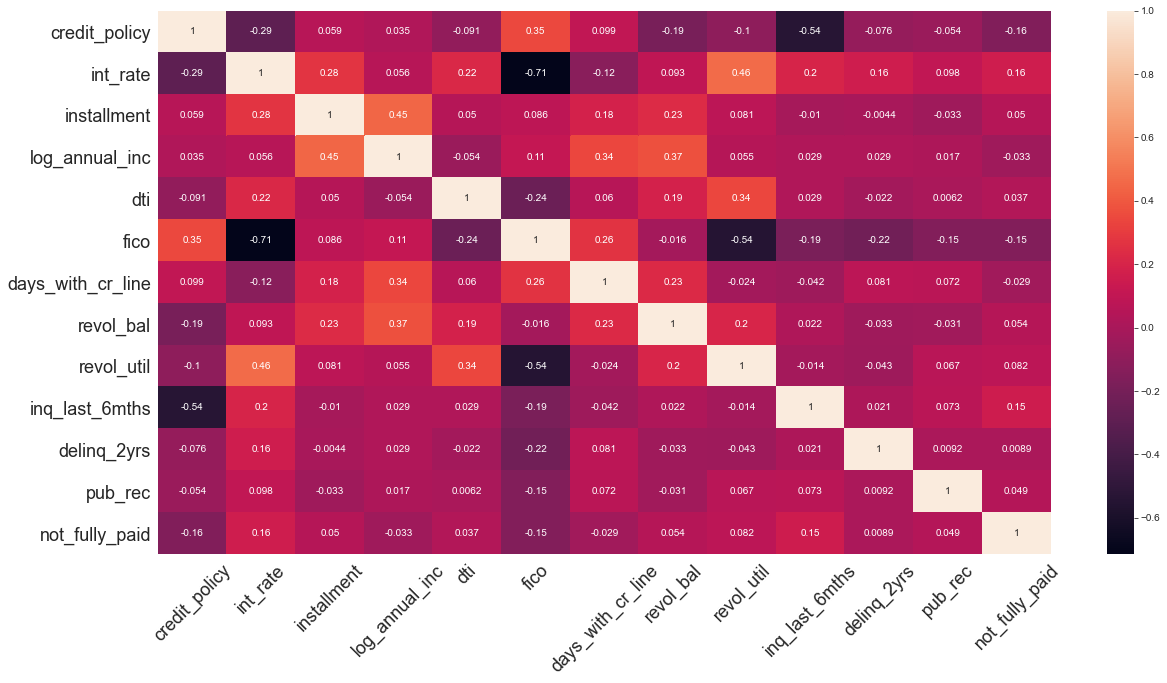

In [13]:
#visualizing the correlation matrix
sns.set_style('whitegrid')
sns.set_palette("mako")
loan_corr=df.corr()
plt.figure(figsize=(20,10))
heat=sns.heatmap(loan_corr,xticklabels=loan_corr.columns,yticklabels=loan_corr.columns,annot=True)
heat.set_xticklabels(heat.get_xmajorticklabels(), fontsize = 18,rotation=45)
heat.set_yticklabels(heat.get_ymajorticklabels(), fontsize = 18)
plt.show()

Interest rate and FICO score shows high negative correlation, and are two standout data points.
However like to point that installment and interest rate show don't show any correlation.

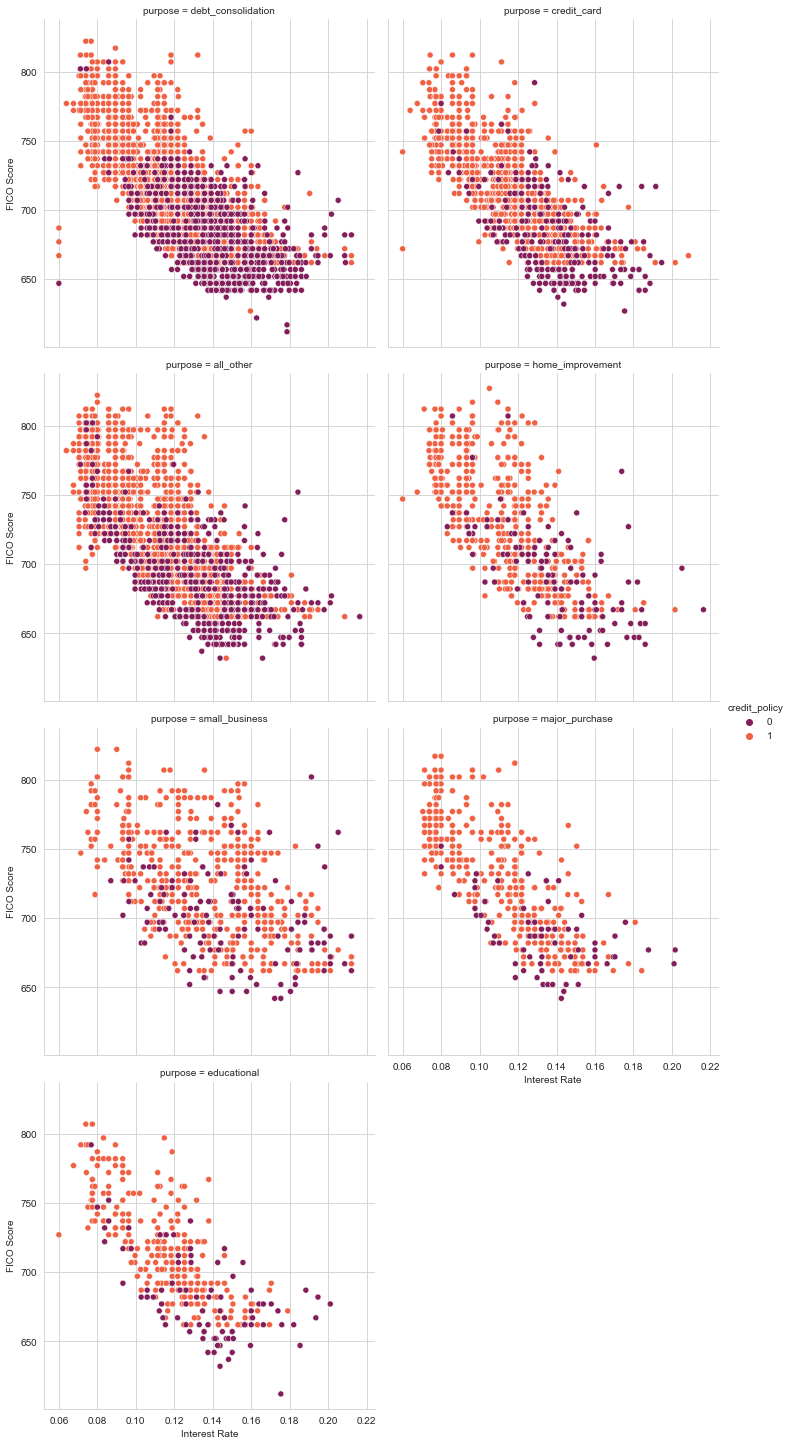

In [14]:
#Slicing and dicing relationship between interest rate and Fico Score
ax=sns.relplot(x='int_rate',y='fico',data=df,kind='scatter',col='purpose',col_wrap=2,hue='credit_policy',palette='rocket')
ax.set(xlabel='Interest Rate',ylabel='FICO Score')
plt.show()

Low FICO score has high interest rate across the board. Chances of getting loan decreses with low Fico Score.Another interesting data point would be to check debt to income ratio.
Plotting DTI's and it's realtion to interest rate, credit worthiness,self report of income and type of business:

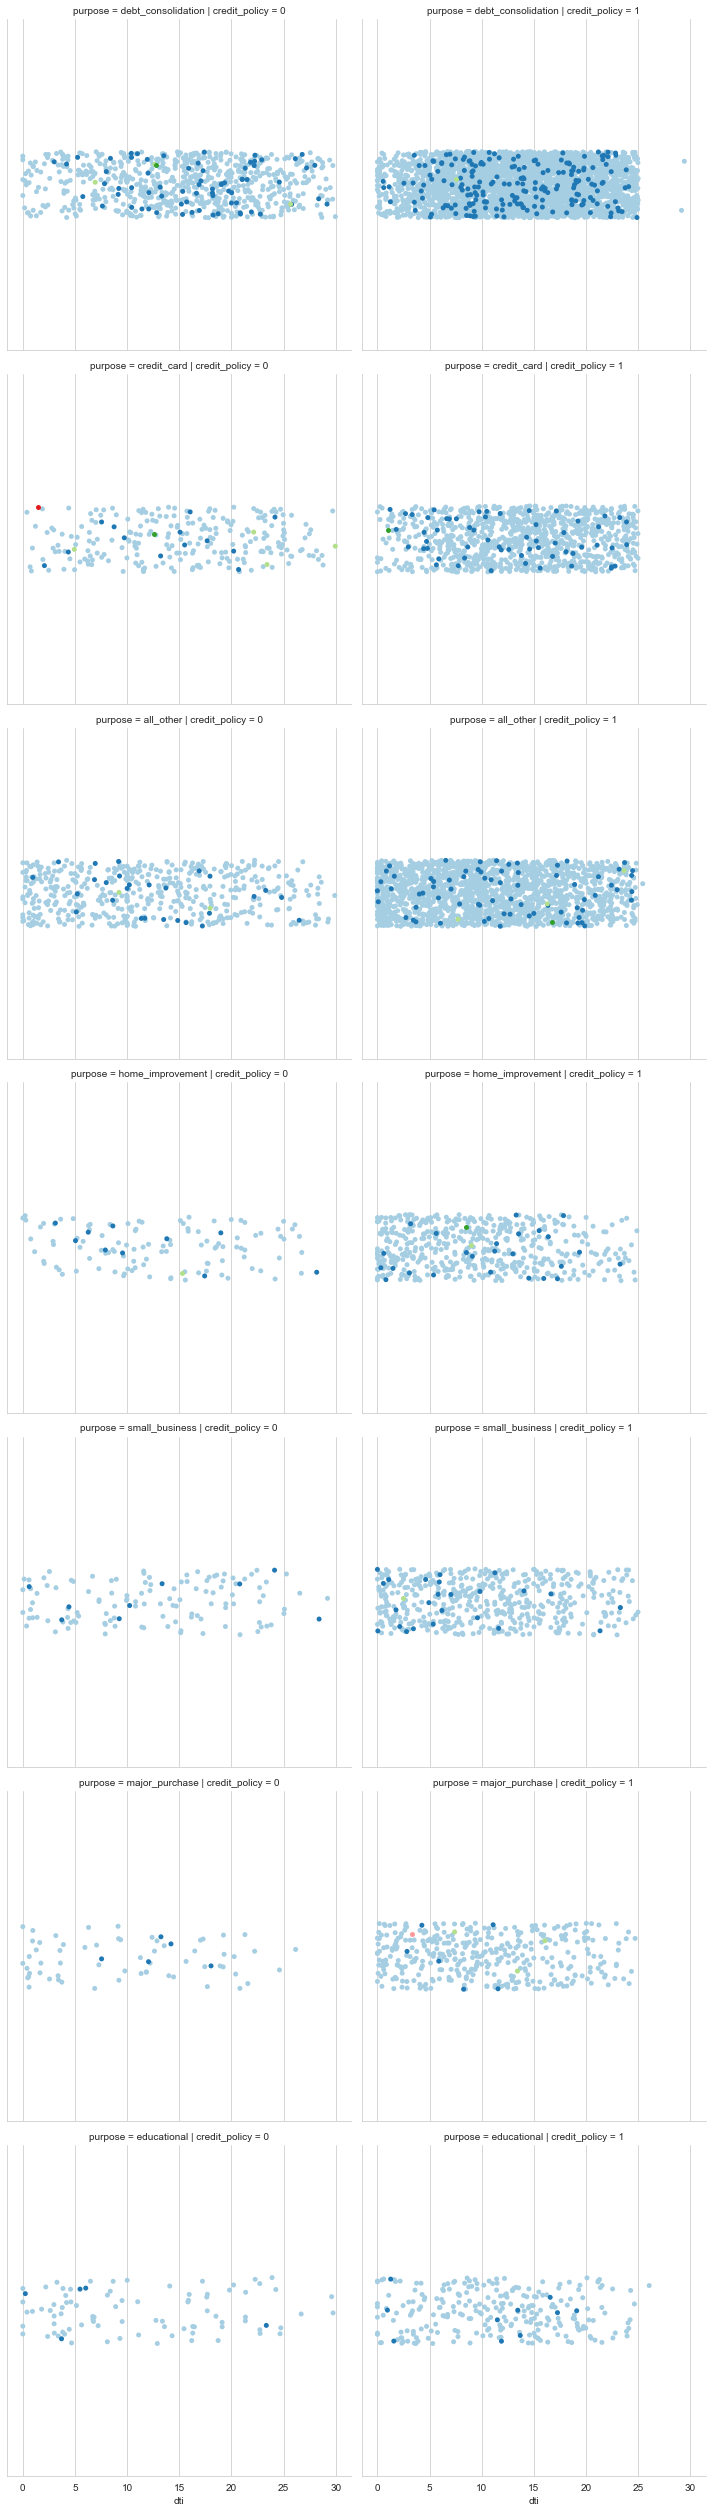

In [15]:
g=sns.FacetGrid(df,col='credit_policy',row='purpose',size=5, aspect=1,hue='pub_rec',palette='Paired')
g.map(sns.stripplot,'dti')
plt.show()

CONCLUSION FROM THE EXPLORATORY DATA ANALYSIS

Small Busniess have higher number of installments as well as higher interest rate.FICO score and interest rate are highly negatively correlated. Lower FICO score would imply higher interest rate and vice versa. Number of enquiries by creditor has negative correlation with underwritter's credit criteria,however not as profound as the realtion between interest rate and FICO score. There is not much pattern for Debt to Income ratio in regards to credit policy or public records.

However among the cohort groups of different puposes Debt Consolidation has the most disparsed data. So I will build a logistic model for the debt consolidation department based on the loan data.

In [16]:
#subsetting the data
df_dc=df[df['purpose']=='debt_consolidation']

In [17]:
display(df_dc.describe())

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000
mean,0.814506,0.126595,358.984390,10.912909,14.076462,703.871367,4533.037139,17146.710639,54.125504,1.461461,0.163255,0.070508,0.152388
std,0.388747,0.024769,198.309002,0.547477,6.433460,34.397778,2340.567954,24167.207708,26.715131,2.059245,0.561788,0.262854,0.359442
min,0.000000,0.060000,23.210000,7.547502,0.000000,612.000000,180.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.111400,201.520000,10.571317,9.200000,677.000000,2925.000000,5494.000000,33.200000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.128000,325.080000,10.903815,14.240000,697.000000,4114.041667,10868.000000,55.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.142600,491.300000,11.238436,19.130000,727.000000,5639.958333,19469.000000,76.300000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.212100,940.140000,14.528354,29.960000,822.000000,16259.041670,290341.000000,119.000000,33.000000,13.000000,3.000000,1.000000


In [18]:
#intiallizing the model
logi = LogisticRegression()

In [19]:
y=df_dc['credit_policy'] #outcome variable

In [20]:
X=df_dc.drop(['credit_policy','purpose'],axis=1) #features

In [21]:
print(X.head())
scaler =StandardScaler()
X_Scaled =scaler.fit_transform(X)
print('printing scaled data')
print(X_Scaled)

   int_rate  installment  log_annual_inc    dti  fico  days_with_cr_line  \
0    0.1189       829.10       11.350407  19.48   737        5639.958333   
2    0.1357       366.86       10.373491  11.63   682        4710.000000   
3    0.1008       162.34       11.350407   8.10   712        2699.958333   
6    0.1496       194.02       10.714418   4.00   667        3180.041667   
9    0.1221        84.12       10.203592  10.00   707        2730.041667   

   revol_bal  revol_util  inq_last_6mths  delinq_2yrs  pub_rec  not_fully_paid  
0      28854        52.1               0            0        0               0  
2       3511        25.6               1            0        0               0  
3      33667        73.2               1            0        0               0  
6       3839        76.8               0            0        1               1  
9       5630        23.0               1            0        0               0  
printing scaled data
[[-0.31071423  2.37092123  0.7992163

In [22]:
#creating training and test sets
X_train, X_test,y_train,y_test=train_test_split(X_Scaled,y,test_size=0.25,random_state=45)

In [23]:
#fitting the model with training data
logi.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_pred=logi.predict(X_test)

MODEL PERFORMANCE

Confustion Matrix

In [25]:
cm=confusion_matrix(y_test,y_pred)

In [26]:
cm

array([[120,  61],
       [ 26, 783]])

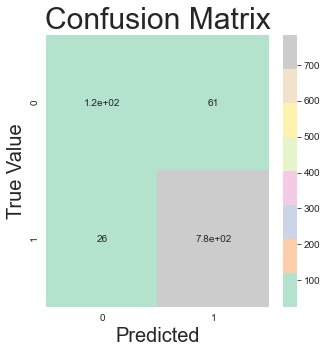

In [27]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,cmap='Pastel2')
plt.xlabel('Predicted',size=20)
plt.ylabel('True Value',size=20)
plt.title('Confusion Matrix',size=30)
plt.show()

Metics to measure model performance:

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.66      0.73       181
           1       0.93      0.97      0.95       809

    accuracy                           0.91       990
   macro avg       0.87      0.82      0.84       990
weighted avg       0.91      0.91      0.91       990



Model has Accuracy of 91%,  another measure of model accuracy would be to use ROC curve

Plotting ROC Curve

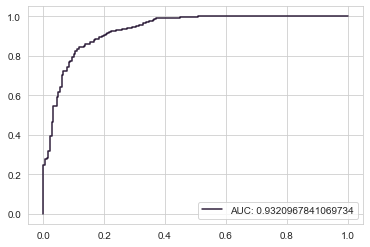

In [29]:
y_pred_prb = logi.predict_proba(X_test)[::,1]
fpr,tpr,threshold= metrics.roc_curve(y_test,y_pred_prb)
auc=metrics.roc_auc_score(y_test,y_pred_prb)
plt.plot(fpr,tpr,label='AUC: '+str(auc))
plt.legend()
plt.show()

A score of .93, the range for the auc is 1 to 0.5

CONCLUSION

The model built has an accuracy of 91% and area under the ROC curve is .93. The model can be used to predict whether a loan applicant for the pupose of debt consolidation will be rejected or accepted. Underwitter can use this model to make a sound decision. There can be a usecase to audit the underwritting process itself. If that process has some underlying bias when it comes to accepting or rejecting a loan applications. Since this model don't uses data such as race, gender etc, a result comaprision from this model and a model which uses race and gender and other demographic data could shed some interesting light as well.